In [1]:
!pip install tensorflow 
!pip install tensorflow keras 
!pip install tensorflow sklearn 
!pip install tensorflow matplotlib 
!pip install tensorflow pandas 
!pip install tensorflow pil

^C


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt#to plot accuracy
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split #to split training and testing data
from keras.utils import to_categorical#to convert the labels present in y_train and t_test into one-hot encoding
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout#to create CNN

In [ ]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()

In [ ]:
#Retrieving the images and their labels
for i in range(classes): 
    path = os. path.join(cur_path,'train', str(i)) 
    images = os.listdir(path) 
    for a in images: 
        try: 
            image = Image.open(path + '\\'+ a) 
            image = image.resize((30,30)) 
            image = np.array(image) 
            data.append(image) 
            labels.append(i) 
        except: 
            print("Error loading image") 
data = np.array(data)
labels = np.array(labels)

In [ ]:
#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)
print(data.shape, labels.shape)


(39209, 30, 30, 3) (39209,)


In [ ]:
#Splitting training and testing dataset
X_t1, X_t2, y_t1, y_t2 = train_test_split(data, labels, test_size=0.2, random_state=42)
print(X_t1.shape, X_t2.shape, y_t1.shape, y_t2.shape)
#Converting the labels into one hot encoding
y_t1 = to_categorical(y_t1, 43)
y_t2 = to_categorical(y_t2, 43)


(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [ ]:
#Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_t1.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

d:\Python\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [ ]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
eps = 15
history = model.fit(X_t1, y_t1, batch_size=32, epochs=eps, validation_data=(X_t2, y_t2))
model.save("my_model.h5")

Epoch 1/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 47s 37ms/step - accuracy: 0.2791 - loss: 3.1103 - val_accuracy: 0.8066 - val_loss: 0.6832
Epoch 2/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 33s 34ms/step - accuracy: 0.7381 - loss: 0.8891 - val_accuracy: 0.9267 - val_loss: 0.2604
Epoch 3/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 34s 34ms/step - accuracy: 0.8384 - loss: 0.5453 - val_accuracy: 0.9470 - val_loss: 0.1864
Epoch 4/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 34s 35ms/step - accuracy: 0.8737 - loss: 0.4299 - val_accuracy: 0.9545 - val_loss: 0.1600
Epoch 5/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 35s 35ms/step - accuracy: 0.8880 - loss: 0.3975 - val_accuracy: 0.9514 - val_loss: 0.1603
Epoch 6/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 43s 38ms/step - accuracy: 0.8964 - loss: 0.3581 - val_accuracy: 0.9680 - val_loss: 0.1187
Epoch 7/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 48s 44ms/step - accuracy: 0.9074 - loss: 0.3068 - val_accuracy: 0.9754 - val_loss: 0.0904
Epoch 8/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 76s 38ms/step - accuracy: 0.9202 - loss: 0.2845 - 

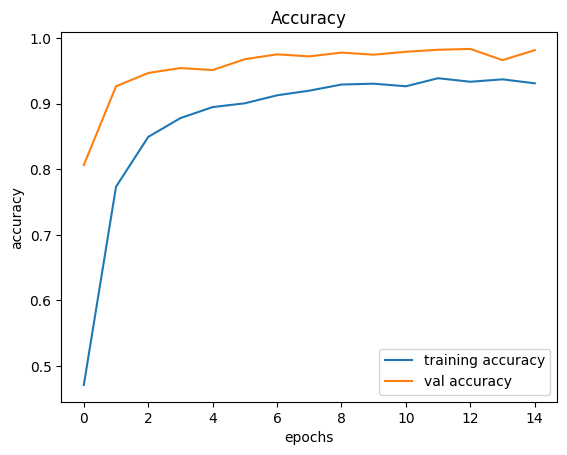

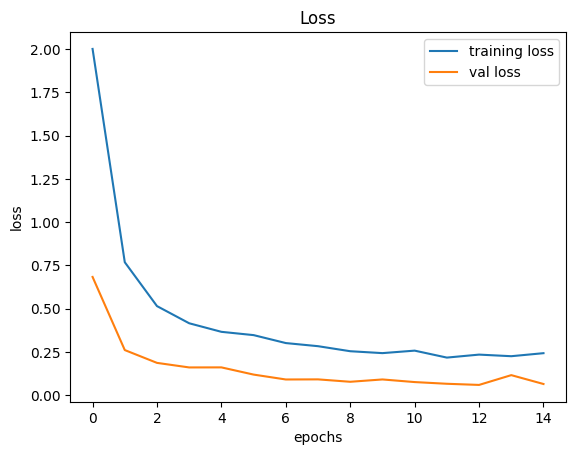

In [ ]:
#plotting graphs for accuracy
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
#testing accuracy on test dataset
from sklearn.metrics import accuracy_score
y_test = pd.read_csv('Test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values
data=[]
for img in imgs:
   image = Image.open(img)
   image = image.resize((30,30))
   data.append(np.array(image))
X_test=np.array(data)

In [ ]:
predicted_probabilities = model.predict(X_test)
pred = predicted_probabilities.argmax(axis=-1)

395/395 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step


In [ ]:
#Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))
model.save("traffic_classifier.h5")

0.9368171021377673
